<a href="https://colab.research.google.com/github/keehyun2/TestPy/blob/master/colab/7-3-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [39]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [40]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# keras 의 fashion_mnist 데이터를 가져옴.
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()


In [ ]:
# 코드가 너무 오래 실행되서 데이터를 10분의 1로 무작위 추출 (데이터를 줄인만큼 모델정확도 떨어짐. )

# 10분의 1로 무작위 추출 (6,000개)
train_input, _, train_target, _ = train_test_split(
    train_input, train_target, train_size=0.1, stratify=train_target, random_state=42)

# 테스트 데이터도 줄이고 싶다면
test_input, _, test_target, _ = train_test_split(
    test_input, test_target, train_size=0.1, stratify=test_target, random_state=42)

In [ ]:
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [41]:
print(train_scaled.shape)

(4800, 28, 28)


In [42]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [43]:
model = model_fn()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [75]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


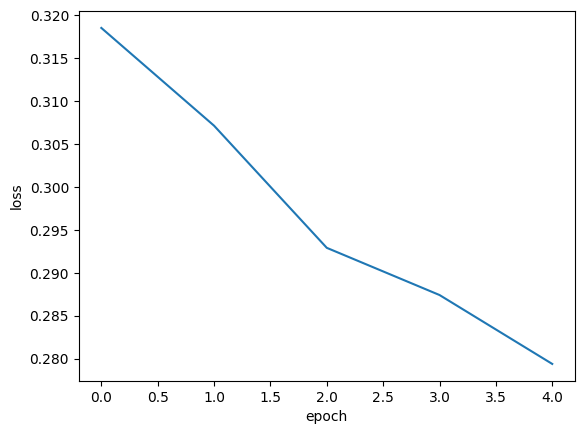

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

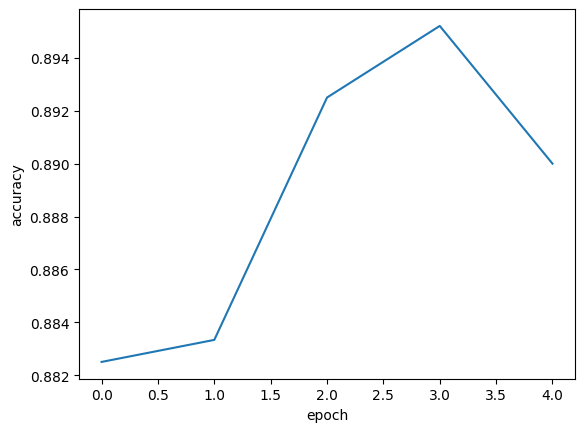

In [77]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [48]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# epochs 가 20 인데 20회 반복학습을 줄여도 좀 빨라질듯... (손실값을 오를듯)

In [ ]:
history.history.

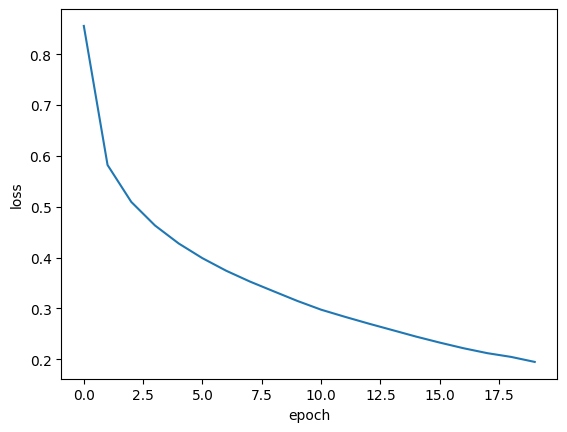

In [49]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [50]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [51]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


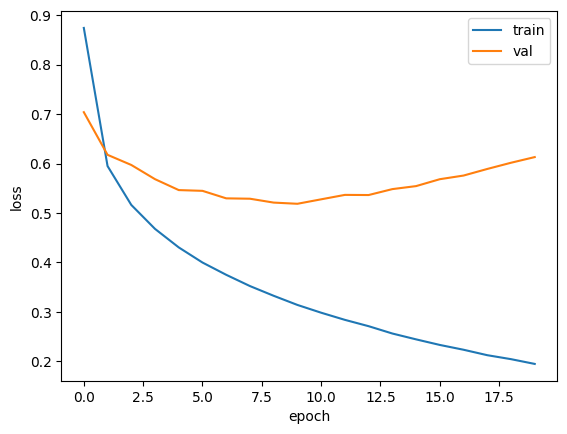

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [53]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

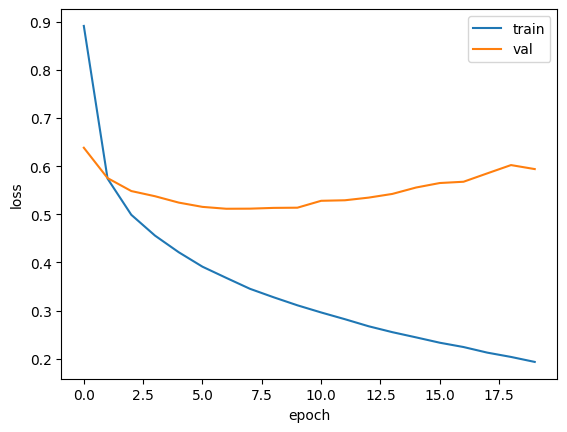

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [55]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

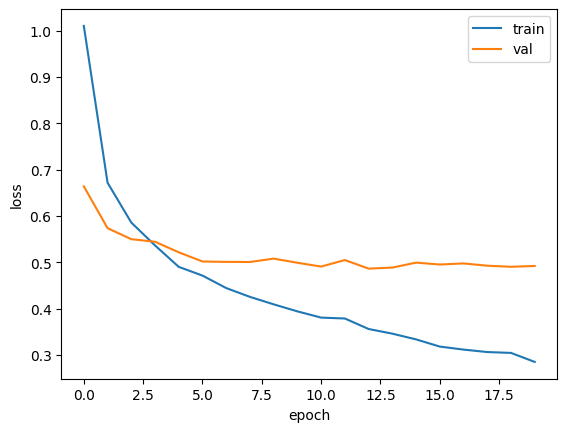

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [59]:
model.save('model-whole.keras')

In [60]:
model.save_weights('model.weights.h5')

In [61]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Jul 16 23:56 model.weights.h5
-rw-r--r-- 1 root root 979394 Jul 16 23:56 model-whole.keras


In [78]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
import numpy as np
result = model.predict(val_scaled)
# print(result)
print(np.sum(result[1]))  # 테스트로 2번째 예측 결과를 합쳐봄.
# 마지막에 활성화 함수를 softmax 를 사용해서
# 전체 합이 1이 나오는 각 class 의 확률을 보여줌.
print(result[0])
print(result.size) # 1200 개

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1.0
[3.8753159e-03 2.4755800e-03 7.5890821e-01 3.1565193e-02 1.4085989e-01
 1.2309135e-04 6.1593831e-02 1.7134247e-05 5.4704264e-04 3.4608831e-05]
12000


In [81]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[3.8753159e-03 2.4755800e-03 7.5890821e-01 ... 1.7134247e-05
  5.4704264e-04 3.4608831e-05]
 [3.4351182e-05 8.8990681e-08 5.1767752e-06 ... 4.8114281e-09
  9.9807101e-01 3.6225462e-08]
 [3.5720766e-02 3.2040469e-07 1.1901841e-02 ... 8.4737932e-09
  6.4331847e-01 2.1748023e-05]
 ...
 [2.9793259e-07 4.0166483e-09 4.5827694e-08 ... 3.9654646e-02
  2.9950372e-05 9.5664048e-01]
 [1.8573940e-02 3.3088085e-01 6.1793840e-01 ... 1.1084546e-06
  1.0468269e-04 1.7960423e-07]
 [1.3417535e-03 3.5351911e-07 9.8400670e-01 ... 3.2007216e-11
  8.9655368e-06 5.6024456e-09]]
[3.8753159e-03 2.4755800e-03 7.5890821e-01 3.1565193e-02 1.4085989e-01
 1.2309135e-04 6.1593831e-02 1.7134247e-05 5.4704264e-04 3.4608831e-05]
12000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.8266666666666667


In [64]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.5394


[0.4945885241031647, 0.8266666531562805]

## 콜백

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [66]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.5226


[0.47294244170188904, 0.8433333039283752]

In [67]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [68]:
print(early_stopping_cb.stopped_epoch)

8


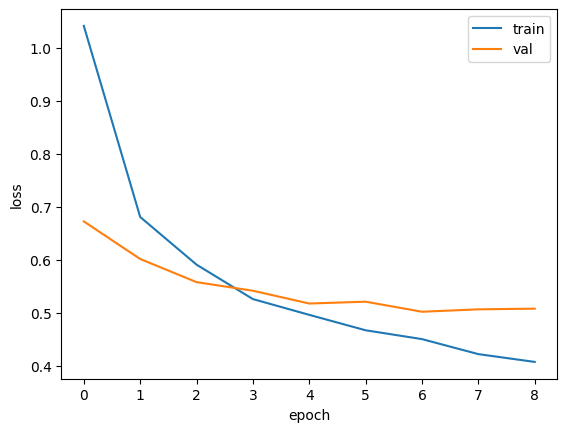

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [70]:
model.evaluate(val_scaled, val_target)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.5419


[0.5015154480934143, 0.82833331823349]